As a data scientist at DeltaSquare,we are tasked with solving the following problem and sharing a proposal for the government.
What are the different factors that influence the income of an individual?

Is there a good predictive model for income that exists? What does the performance assessment look like for such a model?

In [1]:
#importing all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score, mean_squared_error, r2_score, \
mean_absolute_error
from sklearn.preprocessing import LabelEncoder


In [2]:
#importing the data set
df = pd.read_csv('who_data.csv')

In [3]:
#creating a copy of the data
data = df.copy()

In [4]:
#lets have a look at our given data
df

,age,workclass,fnlwgt,education,education_no_of_years,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,working_hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [5]:
#to get a bit more insight of the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   age                     32561 non-null  int64 
 1   workclass               32561 non-null  object
 2   fnlwgt                  32561 non-null  int64 
 3   education               32561 non-null  object
 4   education_no_of_years   32561 non-null  int64 
 5   marital_status          32561 non-null  object
 6   occupation              32561 non-null  object
 7   relationship            32561 non-null  object
 8   race                    32561 non-null  object
 9   sex                     32561 non-null  object
 10  capital_gain            32561 non-null  int64 
 11  capital_loss            32561 non-null  int64 
 12  working_hours_per_week  32561 non-null  int64 
 13  native_country          32561 non-null  object
 14  salary                  32561 non-null  object
dtypes:

In [6]:
#have a look the columns in the data set
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_no_of_years',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'working_hours_per_week',
       'native_country', 'salary'],
      dtype='object')

We will now perform explonatory analysis on the data


In [7]:
#to check if we have missing values
df.isnull().sum()

age                       0
workclass                 0
fnlwgt                    0
education                 0
education_no_of_years     0
marital_status            0
occupation                0
relationship              0
race                      0
sex                       0
capital_gain              0
capital_loss              0
working_hours_per_week    0
native_country            0
salary                    0
dtype: int64

  The data set is clean and needs  no further cleansing. I will now have a look at the unique values of each columns.

Visualising and checking the descriptive statistics of my data

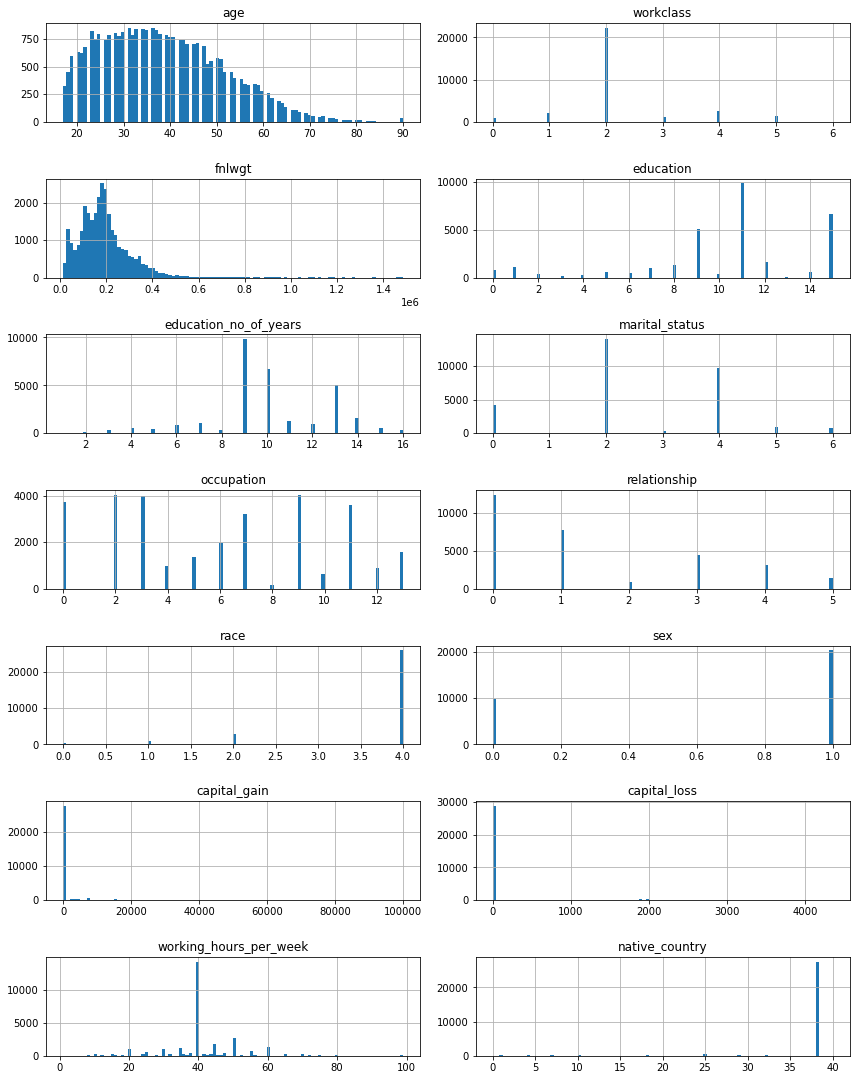

In [61]:
#selecting all columnbs except the target variable
columns = list(df)[:-1]

df[columns].hist(stacked = False, bins = 100, figsize = (12,30), layout = (14, 2));

#the titles are overlapping, the code below will fix it
plt.tight_layout();

In [9]:
#checking the unique of each columns
df['age'].unique()

array([39, 50, 38, 53, 28, 37, 49, 52, 31, 42, 30, 23, 32, 40, 34, 25, 43,
       54, 35, 59, 56, 19, 20, 45, 22, 48, 21, 24, 57, 44, 41, 29, 18, 47,
       46, 36, 79, 27, 67, 33, 76, 17, 55, 61, 70, 64, 71, 68, 66, 51, 58,
       26, 60, 90, 75, 65, 77, 62, 63, 80, 72, 74, 69, 73, 81, 78, 88, 82,
       83, 84, 85, 86, 87], dtype=int64)

In [10]:
df['workclass'].unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

There is an invalid entry of '?' in the workclass column

In [11]:
df['fnlwgt'].unique()

array([ 77516,  83311, 215646, ...,  34066,  84661, 257302], dtype=int64)

In [12]:
df['education'].unique()

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [13]:
df['education_no_of_years'].unique()

array([13,  9,  7, 14,  5, 10, 12, 11,  4, 16, 15,  3,  6,  2,  1,  8],
      dtype=int64)

In [14]:
df['marital_status'].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [15]:
df['occupation'].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
       ' Transport-moving', ' Farming-fishing', ' Machine-op-inspct',
       ' Tech-support', ' ?', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

There are invalid entries of '?' in the occupation column

In [16]:
df['relationship'].unique()

array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [17]:
df['race'].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [18]:
df['sex'].unique()

array([' Male', ' Female'], dtype=object)

In [19]:
df['capital_gain'].unique()

array([ 2174,     0, 14084,  5178,  5013,  2407, 14344, 15024,  7688,
       34095,  4064,  4386,  7298,  1409,  3674,  1055,  3464,  2050,
        2176,   594, 20051,  6849,  4101,  1111,  8614,  3411,  2597,
       25236,  4650,  9386,  2463,  3103, 10605,  2964,  3325,  2580,
        3471,  4865, 99999,  6514,  1471,  2329,  2105,  2885, 25124,
       10520,  2202,  2961, 27828,  6767,  2228,  1506, 13550,  2635,
        5556,  4787,  3781,  3137,  3818,  3942,   914,   401,  2829,
        2977,  4934,  2062,  2354,  5455, 15020,  1424,  3273, 22040,
        4416,  3908, 10566,   991,  4931,  1086,  7430,  6497,   114,
        7896,  2346,  3418,  3432,  2907,  1151,  2414,  2290, 15831,
       41310,  4508,  2538,  3456,  6418,  1848,  3887,  5721,  9562,
        1455,  2036,  1831, 11678,  2936,  2993,  7443,  6360,  1797,
        1173,  4687,  6723,  2009,  6097,  2653,  1639, 18481,  7978,
        2387,  5060], dtype=int64)

In [20]:
df['capital_loss'].unique()

array([   0, 2042, 1408, 1902, 1573, 1887, 1719, 1762, 1564, 2179, 1816,
       1980, 1977, 1876, 1340, 2206, 1741, 1485, 2339, 2415, 1380, 1721,
       2051, 2377, 1669, 2352, 1672,  653, 2392, 1504, 2001, 1590, 1651,
       1628, 1848, 1740, 2002, 1579, 2258, 1602,  419, 2547, 2174, 2205,
       1726, 2444, 1138, 2238,  625,  213, 1539,  880, 1668, 1092, 1594,
       3004, 2231, 1844,  810, 2824, 2559, 2057, 1974,  974, 2149, 1825,
       1735, 1258, 2129, 2603, 2282,  323, 4356, 2246, 1617, 1648, 2489,
       3770, 1755, 3683, 2267, 2080, 2457,  155, 3900, 2201, 1944, 2467,
       2163, 2754, 2472, 1411], dtype=int64)

In [21]:
df['working_hours_per_week'].unique()

array([40, 13, 16, 45, 50, 80, 30, 35, 60, 20, 52, 44, 15, 25, 38, 43, 55,
       48, 58, 32, 70,  2, 22, 56, 41, 28, 36, 24, 46, 42, 12, 65,  1, 10,
       34, 75, 98, 33, 54,  8,  6, 64, 19, 18, 72,  5,  9, 47, 37, 21, 26,
       14,  4, 59,  7, 99, 53, 39, 62, 57, 78, 90, 66, 11, 49, 84,  3, 17,
       68, 27, 85, 31, 51, 77, 63, 23, 87, 88, 73, 89, 97, 94, 29, 96, 67,
       82, 86, 91, 81, 76, 92, 61, 74, 95], dtype=int64)

In [22]:
df['salary'].unique()

array([' <=50K', ' >50K'], dtype=object)

There are invalid entries of '?' in the native country column

In [23]:
df['native_country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

I will check the colums with '?' in workclass,native country and occupaton
There are 1836 rows with invalid entries for workclass  

In [24]:
#i will check the colums with '?' in workclass,native country and occupaton
df[df['workclass'] == ' ?']

,age,workclass,fnlwgt,education,education_no_of_years,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,working_hours_per_week,native_country,salary
27,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
61,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
69,25,?,200681,Some-college,10,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
77,67,?,212759,10th,6,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,<=50K
106,17,?,304873,10th,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32530,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32531,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32539,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32541,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


There are 1843 entries with invalid entries for ocupation  

In [25]:
df[df['occupation'] == ' ?']

,age,workclass,fnlwgt,education,education_no_of_years,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,working_hours_per_week,native_country,salary
27,54,?,180211,Some-college,10,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0,0,60,South,>50K
61,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
69,25,?,200681,Some-college,10,Never-married,?,Own-child,White,Male,0,0,40,United-States,<=50K
77,67,?,212759,10th,6,Married-civ-spouse,?,Husband,White,Male,0,0,2,United-States,<=50K
106,17,?,304873,10th,6,Never-married,?,Own-child,White,Female,34095,0,32,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32530,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32531,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32539,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32541,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


There are 583 rows with invalid entries with '?'

In [26]:
df[df['native_country'] == ' ?']

,age,workclass,fnlwgt,education,education_no_of_years,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,working_hours_per_week,native_country,salary
14,40,Private,121772,Assoc-voc,11,Married-civ-spouse,Craft-repair,Husband,Asian-Pac-Islander,Male,0,0,40,?,>50K
38,31,Private,84154,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,0,0,38,?,>50K
51,18,Private,226956,HS-grad,9,Never-married,Other-service,Own-child,White,Female,0,0,30,?,<=50K
61,32,?,293936,7th-8th,4,Married-spouse-absent,?,Not-in-family,White,Male,0,0,40,?,<=50K
93,30,Private,117747,HS-grad,9,Married-civ-spouse,Sales,Wife,Asian-Pac-Islander,Female,0,1573,35,?,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32449,44,Self-emp-inc,71556,Masters,14,Married-civ-spouse,Sales,Husband,White,Male,0,0,50,?,>50K
32469,58,Self-emp-inc,181974,Doctorate,16,Never-married,Prof-specialty,Not-in-family,White,Female,0,0,99,?,<=50K
32492,42,Self-emp-not-inc,217597,HS-grad,9,Divorced,Sales,Own-child,White,Male,0,0,50,?,<=50K
32510,39,Private,107302,HS-grad,9,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,45,?,>50K


In [27]:
#this function checks the shape of the data
df.shape

(32561, 15)

In [28]:
#i will be dropping the entries with '?' in workclass,native_country and occupation
df.drop(df.loc[df['workclass']== ' ?'].index, inplace=True)

In [29]:
#i will be dropping the entries with '?' in workclass,native_country and occupation
df.drop(df.loc[df['native_country']== ' ?'].index, inplace=True)

In [30]:
#i will be dropping the entries with '?' in workclass,native_country and occupation
df.drop(df.loc[df['occupation']== ' ?'].index, inplace=True)

In [31]:
#calling our data frame to be sure the dropping has taken placehas taken place
df

,age,workclass,fnlwgt,education,education_no_of_years,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,working_hours_per_week,native_country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [32]:
#to check our data frame is clean and right and ready to work with
df.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   age                     30162 non-null  int64 
 1   workclass               30162 non-null  object
 2   fnlwgt                  30162 non-null  int64 
 3   education               30162 non-null  object
 4   education_no_of_years   30162 non-null  int64 
 5   marital_status          30162 non-null  object
 6   occupation              30162 non-null  object
 7   relationship            30162 non-null  object
 8   race                    30162 non-null  object
 9   sex                     30162 non-null  object
 10  capital_gain            30162 non-null  int64 
 11  capital_loss            30162 non-null  int64 
 12  working_hours_per_week  30162 non-null  int64 
 13  native_country          30162 non-null  object
 14  salary                  30162 non-null  object
dtypes:

Machine learning doesnt take text, so we have to encode the object datatypes

In [33]:
#machine learning doesnt take text, so we have to encode i

#create instance of label encoder
lab = LabelEncoder()

#perform label encoding on 'salary' column
df['salary']= lab.fit_transform(df['salary'])

In [34]:
#create instance of label encoder
lab = LabelEncoder()

#perform label encoding on 'workclass' column
df['workclass']= lab.fit_transform(df['workclass'])

In [35]:
#create instance of label encoder
lab = LabelEncoder()

#perform label encoding on 'education' column
df['education']= lab.fit_transform(df['education'])

In [36]:
#create instance of label encoder
lab = LabelEncoder()

#perform label encoding on 'marital_status' column
df['marital_status']= lab.fit_transform(df['marital_status'])

In [37]:
#create instance of label encoder
lab = LabelEncoder()

#perform label encoding on 'occupation' column
df['occupation']= lab.fit_transform(df['occupation'])

In [38]:
#create instance of label encoder
lab = LabelEncoder()

#perform label encoding on 'relationship' column
df['relationship']= lab.fit_transform(df['relationship'])

In [39]:
#create instance of label encoder
lab = LabelEncoder()

#perform label encoding on 'race' column
df['race']= lab.fit_transform(df['race'])

In [40]:
#create instance of label encoder
lab = LabelEncoder()

#perform label encoding on 'sex' column
df['sex']= lab.fit_transform(df['sex'])

In [41]:
#create instance of label encoder
lab = LabelEncoder()

#perform label encoding on 'native_country' column
df['native_country']= lab.fit_transform(df['native_country'])

All required columns have been sucessfully encoded to give us numerucal entries, so we can go ahead to build our model

Our salary column has been encoded succesfully, where 0 is for salary less than or equals to 50,000 dollars and 1 is for salary greater than 50,000 dolars in the data frame

In [42]:
#checking the info of the dataset now
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   age                     30162 non-null  int64
 1   workclass               30162 non-null  int32
 2   fnlwgt                  30162 non-null  int64
 3   education               30162 non-null  int32
 4   education_no_of_years   30162 non-null  int64
 5   marital_status          30162 non-null  int32
 6   occupation              30162 non-null  int32
 7   relationship            30162 non-null  int32
 8   race                    30162 non-null  int32
 9   sex                     30162 non-null  int32
 10  capital_gain            30162 non-null  int64
 11  capital_loss            30162 non-null  int64
 12  working_hours_per_week  30162 non-null  int64
 13  native_country          30162 non-null  int32
 14  salary                  30162 non-null  int32
dtypes: int32(9), int64(

In [77]:
#this shows our data is imbalance, one category is higher than the other
df['salary'].value_counts()

0    22654
1     7508
Name: salary, dtype: int64

In [78]:
#to get the majority and minority class in percentage
#this shows our data is imbalance, one category is higher than the other
df['salary'].value_counts(normalize = True)

0    0.751078
1    0.248922
Name: salary, dtype: float64

This shows thats 75.11% of individuals earn less than 50,000 dollars in a year

In [43]:
#lets see how correlated the variables are
df.corr()

,age,workclass,fnlwgt,education,education_no_of_years,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,working_hours_per_week,native_country,salary
age,1.000000,0.080540,-0.076511,-0.001111,0.043526,-0.276373,-0.005682,-0.246456,0.023374,0.081993,0.080154,0.060165,0.101599,-0.001905,0.241998
workclass,0.080540,1.000000,-0.032493,0.017855,0.037833,-0.034241,0.015572,-0.067417,0.044731,0.074973,0.035350,0.007204,0.050724,0.007668,0.018044
fnlwgt,-0.076511,-0.032493,1.000000,-0.027102,-0.044992,0.032163,0.000204,0.009298,-0.023895,0.025362,0.000422,-0.009750,-0.022886,-0.066717,-0.008957
education,-0.001111,0.017855,-0.027102,1.000000,0.345410,-0.040664,-0.038212,-0.012717,0.011154,-0.027888,0.030575,0.015028,0.059887,0.078790,0.078987
education_no_of_years,0.043526,0.037833,-0.044992,0.345410,1.000000,-0.063419,0.087717,-0.091935,0.032805,0.006157,0.124416,0.079646,0.152522,0.091555,0.335286
marital_status,-0.276373,-0.034241,0.032163,-0.040664,-0.063419,1.000000,0.022655,0.177964,-0.068627,-0.119813,-0.042418,-0.035203,-0.189003,-0.025902,-0.193518
occupation,-0.005682,0.015572,0.000204,-0.038212,0.087717,0.022655,1.000000,-0.053727,0.000717,0.062313,0.022162,0.014607,0.018365,-0.003483,0.051577
relationship,-0.246456,-0.067417,0.009298,-0.012717,-0.091935,0.177964,-0.053727,1.000000,-0.117143,-0.584876,-0.058259,-0.063567,-0.257850,-0.010809,-0.251003
race,0.023374,0.044731,-0.023895,0.011154,0.032805,-0.068627,0.000717,-0.117143,1.000000,0.089186,0.014353,0.023517,0.048532,0.124514,0.071658
sex,0.081993,0.074973,0.025362,-0.027888,0.006157,-0.119813,0.062313,-0.584876,0.089186,1.000000,0.048814,0.047011,0.231268,0.000618,0.216699


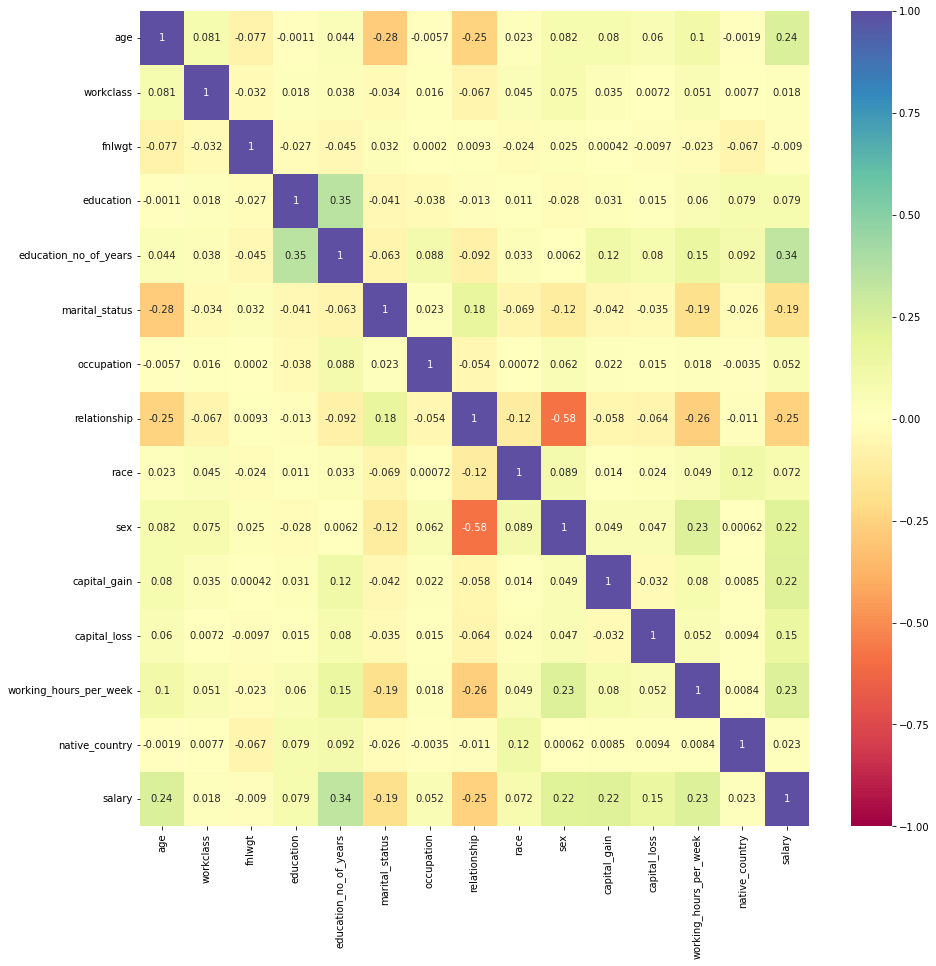

In [76]:
# plotting correlation heatmap
plt.figure(figsize = (15, 15))
dataplot = sns.heatmap(df.corr(), vmin = -1, vmax =1, cmap="Spectral", annot=True)
  
# displaying heatmap
plt.show()

From our correlation, the number of education years is more coreelated to income of individuals than other variables

In [45]:
#dropping the target variable
X = df.drop(['salary'], axis =1)
Y=df['salary']

In [46]:
X

,age,workclass,fnlwgt,education,education_no_of_years,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,working_hours_per_week,native_country
0,39,5,77516,9,13,4,0,1,4,1,2174,0,40,38
1,50,4,83311,9,13,2,3,0,4,1,0,0,13,38
2,38,2,215646,11,9,0,5,1,4,1,0,0,40,38
3,53,2,234721,1,7,2,5,0,2,1,0,0,40,38
4,28,2,338409,9,13,2,9,5,2,0,0,0,40,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,2,257302,7,12,2,12,5,4,0,0,0,38,38
32557,40,2,154374,11,9,2,6,0,4,1,0,0,40,38
32558,58,2,151910,11,9,6,0,4,4,0,0,0,40,38
32559,22,2,201490,11,9,4,0,3,4,1,0,0,20,38


In [47]:
Y

0        0
1        0
2        0
3        0
4        0
        ..
32556    0
32557    1
32558    0
32559    0
32560    1
Name: salary, Length: 30162, dtype: int32

In [48]:
#we can see the individuals that earn more than 50,000 are the minority class
df['salary'].value_counts()

0    22654
1     7508
Name: salary, dtype: int64

In [79]:
#splitting the data sets into test and train
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.2,random_state =0, stratify = Y)

In [80]:
#Checking the test and train shape
X_test.shape

(6033, 14)

In [81]:
X_train.shape

(24129, 14)

In [82]:
#checking the descriptive statistics of the data
df.describe()

,age,workclass,fnlwgt,education,education_no_of_years,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,working_hours_per_week,native_country,salary
count,30162.000000,30162.000000,3.016200e+04,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,2.199324,1.897938e+05,10.333764,10.121312,2.580134,5.959850,1.418341,3.678602,0.675685,1092.007858,88.372489,40.931238,36.382567,0.248922
std,13.134665,0.953925,1.056530e+05,3.812292,2.549995,1.498016,4.029566,1.601338,0.834709,0.468126,7406.346497,404.298370,11.979984,6.105372,0.432396
min,17.000000,0.000000,1.376900e+04,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,2.000000,1.176272e+05,9.000000,9.000000,2.000000,2.000000,0.000000,4.000000,0.000000,0.000000,0.000000,40.000000,38.000000,0.000000
50%,37.000000,2.000000,1.784250e+05,11.000000,10.000000,2.000000,6.000000,1.000000,4.000000,1.000000,0.000000,0.000000,40.000000,38.000000,0.000000
75%,47.000000,2.000000,2.376285e+05,12.000000,13.000000,4.000000,9.000000,3.000000,4.000000,1.000000,0.000000,0.000000,45.000000,38.000000,0.000000
max,90.000000,6.000000,1.484705e+06,15.000000,16.000000,6.000000,13.000000,5.000000,4.000000,1.000000,99999.000000,4356.000000,99.000000,40.000000,1.000000


In [83]:
#we will now normalize our data with the standard scaler before building the model
#creating an instance for standardscaler()
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [84]:
#creating instance for logistic regression
log_reg = LogisticRegression()
log_reg.fit(X_train_sc, Y_train)

LogisticRegression()

In [85]:
#checking the coefficients of the log_reg
log_reg.coef_

array([[ 4.81327314e-01, -1.12309624e-01,  5.67636277e-02,
         7.66520430e-02,  8.59243828e-01, -3.41740325e-01,
        -2.11829969e-04, -2.20787905e-01,  9.97859370e-02,
         4.10058963e-01,  2.40148563e+00,  2.73492056e-01,
         3.46466538e-01,  1.32839906e-02]])

In [86]:
#checking the accuracy score
print('Train Accuracy: {:.4f}'.format(log_reg.score(X_train_sc,Y_train)))
print('Test Accuracy: {:.4f}'.format(log_reg.score(X_test_sc,Y_test)))

Train Accuracy: 0.8203
Test Accuracy: 0.8221


In [87]:
#To check our r2 score, we need to make predictions first
pred = log_reg.predict(X_test_sc)
r2_score(Y_test, pred)

0.04880610888564352

In [88]:
#we will now make predictions to check our error
predict_train = log_reg.predict(X_train_sc)
predict_test = log_reg.predict(X_test_sc)

In [89]:
#checking the mean squared error
print('Train error: {:.4f}'.format(mean_squared_error(Y_train,predict_train)))
print('Test error: {:.4f}'.format(mean_squared_error(Y_test,predict_test)))

Train error: 0.1797
Test error: 0.1779


We will now use Confusion Matrix metrics such as precision_score, recall and f1 score to check/evaluate our model to be sure it isnt bias

In [92]:
#to check our precision score, we will first make predictions
test_predict = log_reg.predict(X_test_sc)
precision = precision_score(Y_test, test_predict)

In [93]:
precision

0.7195496417604913

This means all the time this model makes predictions, 72% are accurate in the prediction

In [96]:
#we will now look at our recall score
recall = recall_score(Y_test, test_predict)

In [98]:
recall

0.46804260985352863

This shows that the machine learning model correctly identifies/ predicts 46.8% as belonging to a class of interest—the “positive class”—out of the total samples for that class.

From the earlier questions we have been put up to, 'What are the different factors that influence the income of an individuals'
The following are the major factors affecting;
1. Number of education of years
2. Working hours per week
3. Age
4. capital gain

And finally, the above model is a good predictive model for income of individuals as it performs well on both the test and training data sets and makes kin imal errors.